# An introduction to the Computable Mapping Class Group

#### Mark Bell
#### Structures on Surfaces 25th June 2021

Q: What can you compute in a **big** mapping class group?

A: Lots, but not everything

## Bigger

<div style="display:flex;">
  <div style="float:left; width:49%; padding:10px;">
    <p> Bigger is a Python package for computing big mapping classes and their actions on non-compact laminations via ideal triangulation coordinates. </p>
    <p>
        Get bigger by running:

    $ pip install bigger
    
https://biggermcg.readthedocs.io

<h3>Lost in Translation Surfaces</h3>
January 29-31 2020 University of Luxembourg
        </p>
  </div>
  <div style="float:left; width:49%; padding:10px;">
    <center><img src="DoublePent.png" style="height:600px;"/></center>


  </div>
</div>







# Group problems (Dehn)

**Word Problem**: Is this element the identity element?

**Conjugacy Problem**: Are these elements conjugate?

**Isomorphism Problem**: Is this group isomorphic to another group?

# Surfaces

In [1]:
import trimesh; trimesh.load_mesh('genus6.obj').show()

**Definition**: A surface is of *infinite-type* if its fundamental group is not finitely generated.

<center><img src="figures/biflute.svg" alt="biflute" style="width: 800px;"/></center>

In [2]:
import bigger

In [3]:
S = bigger.load.biflute()

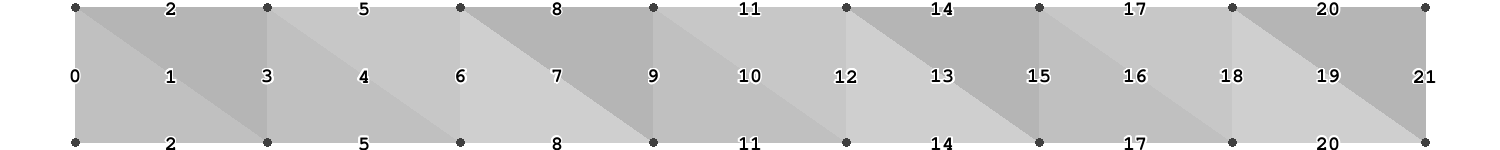

In [7]:
S.draw(range(1, 20), layout=S, label='edge', w=1500, h=150, textsize=20)

Let's make a quick drawing function to save us constantly writing these default options

In [8]:
draw = bigger.draw(edges=range(1, 30), layout=S, w=1500, h=150, textsize=20)

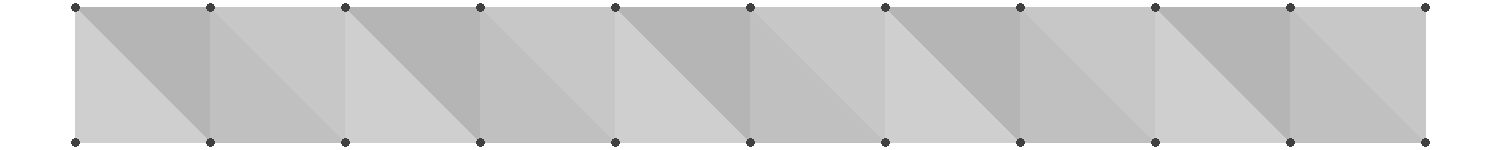

In [9]:
draw(S)

# Laminations

In [10]:
a1 = S.triangulation({4:1, 5:1})
a1

Lamination 4: 1, 5: 1

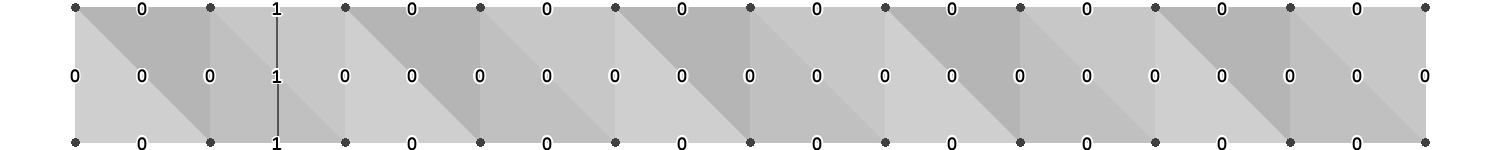

In [11]:
draw(a1, label='weight')

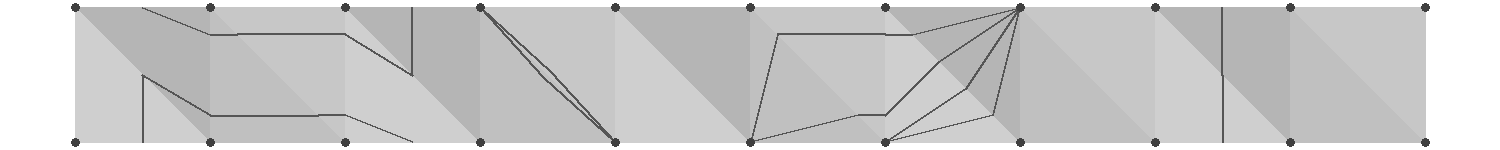

In [13]:
draw(S.triangulation({1:1, 2:1, 3:2, 4:2, 6:2, 7:1, 8:1, 10:-2, 16:2, 18:2, 19:4, 25:1, 26:1}))

**Exercise**: A lamination is determined by the number of times it intersects the edges of the triangulation*.

<center><img src="coordinates.png" style="height:300px;"/></center>

In [14]:
p = S.triangulation(lambda n: 2)
p

Infinitely supported lamination 0: 2, -1: 2, 1: 2, -2: 2, 2: 2, -3: 2, 3: 2, -4: 2, 4: 2, -5: 2 ...

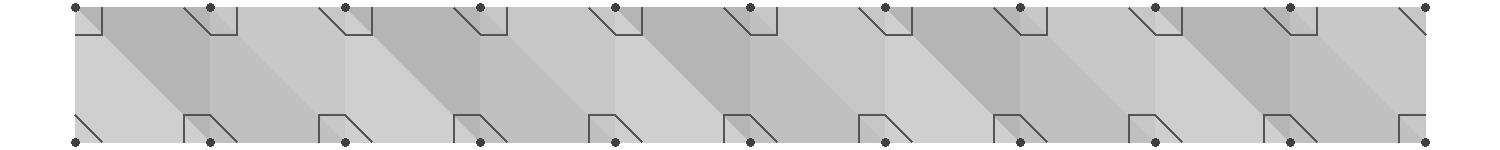

In [15]:
draw(p)

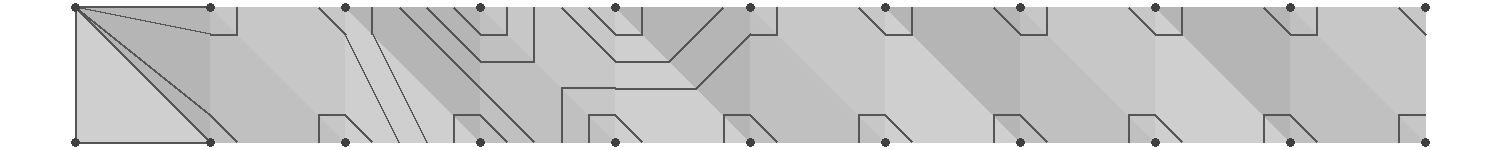

In [16]:
draw(S.triangulation(lambda n: 4 if 7 < n < 14 else 2 if n > 2 else -1))

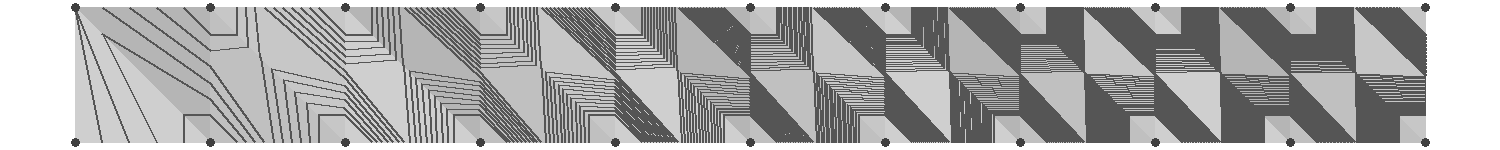

In [17]:
draw(S.triangulation(lambda n: 2*abs(n)))

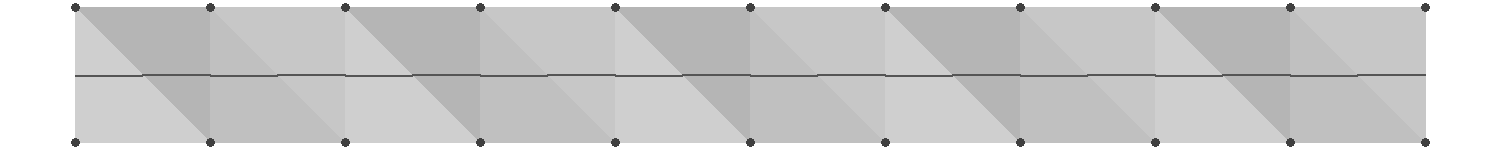

In [18]:
horizontal = S.triangulation(lambda n: 1 if n % 3 != 2 else 0)
draw(horizontal)

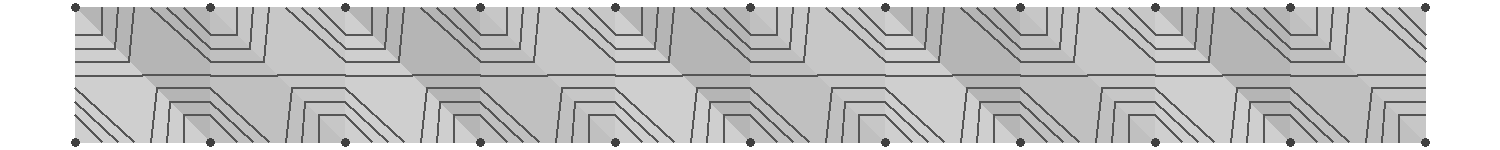

In [19]:
draw(horizontal + 3 * p)

# Mapping Classes

Isotopy classes of homeomorphisms a surface

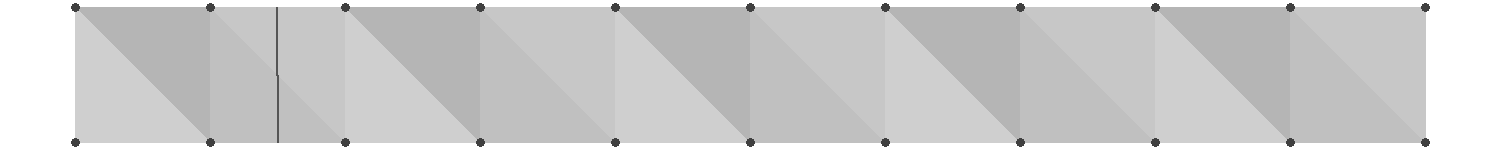

In [20]:
draw(a1)

We can form the Dehn twist about the curve `a1`

In [21]:
T_a1 = a1.twist()

Infinitely supported lamination 0: 1, -1: 0, 1: 1, -2: 1, 2: 0, -3: 1, 3: 1, -4: 0, 4: 1, -5: 1 ...


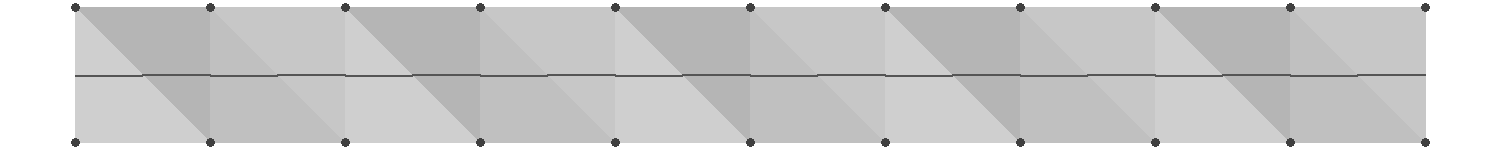

In [22]:
print(horizontal)
draw(horizontal)

Infinitely supported lamination -2: 1, 1: 1, 0: 1, 0: 1, -2: 1, -3: 1, -2: 1, 0: 1, 3: 1, 1: 1 ...


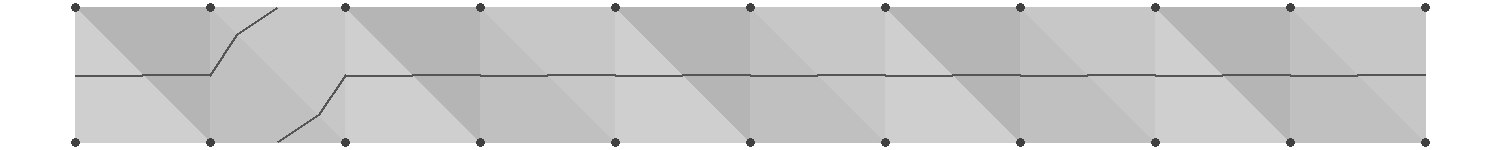

In [23]:
print(T_a1(horizontal))
draw(T_a1(horizontal))

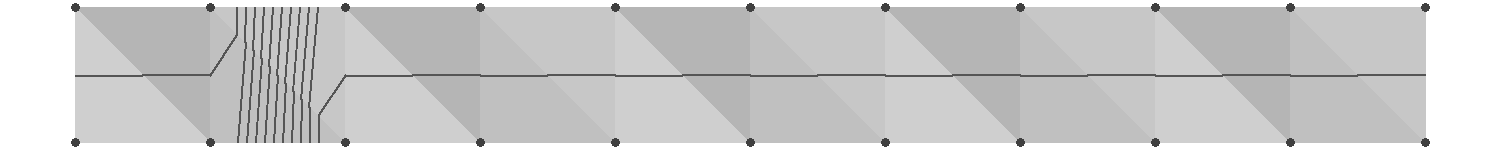

In [24]:
draw((T_a1**10)(horizontal))

Infinitely supported lamination 0: 1, 1: 1, -2: 1, -3: 1, 3: 1, 4: 2, 4: 2, 5: 1, -5: 1, 5: 1 ...


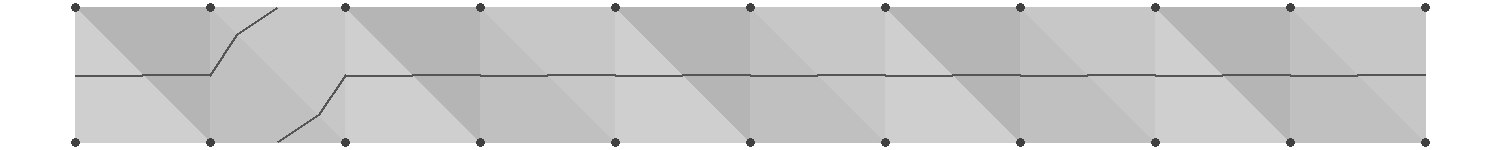

In [25]:
print(S('a[1]')(horizontal))
draw(S('a[1]')(horizontal))

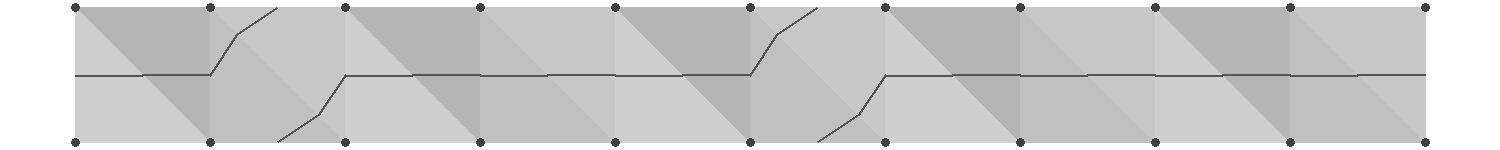

In [26]:
draw(S('a[1].a[5]')(horizontal))

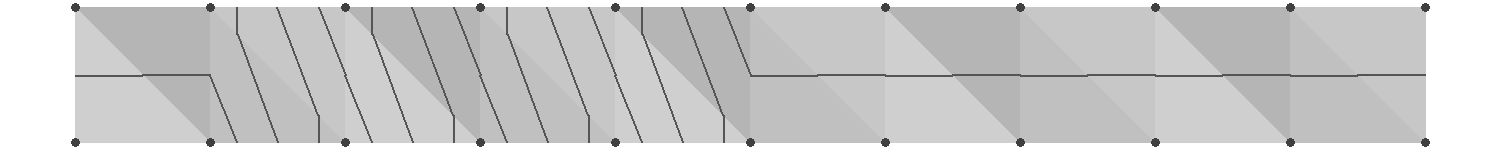

In [27]:
draw((S('a[1:5]')**-3)(horizontal))

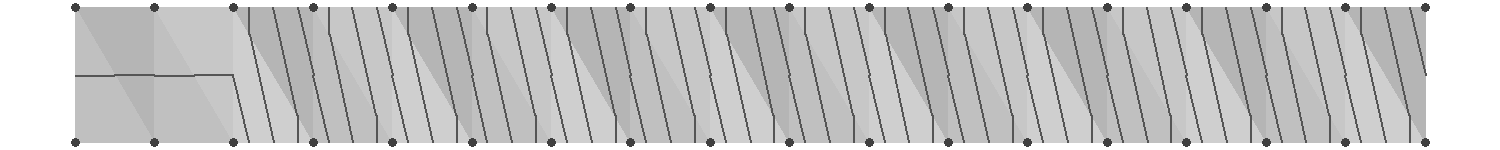

In [30]:
draw((S('a[2:]')**-3)(horizontal), edges=range(1,50))

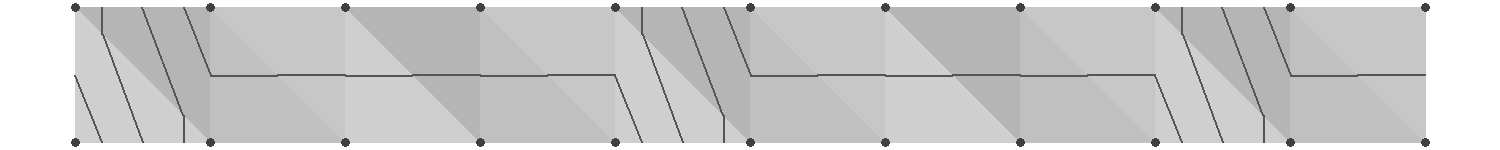

In [31]:
draw((S('a[::4]')**-3)(horizontal))

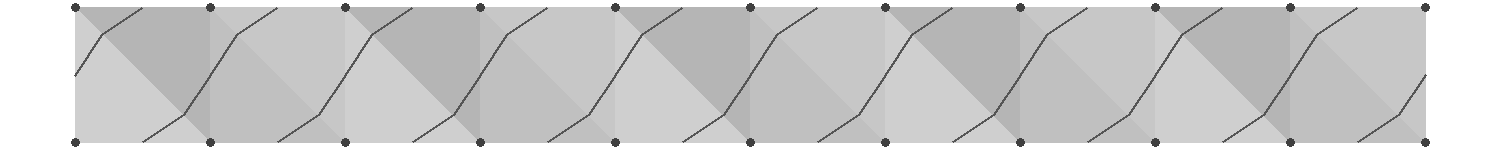

In [33]:
draw(S('a')(horizontal))

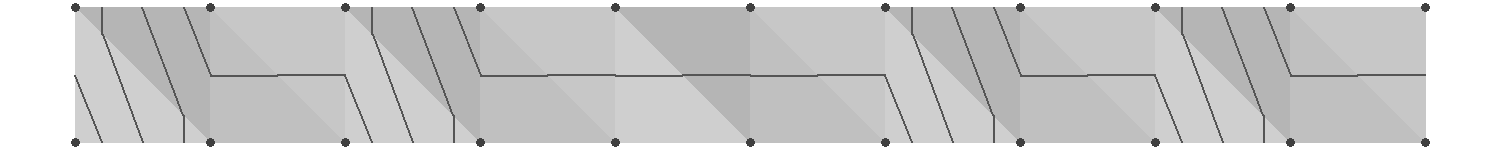

In [34]:
draw((S('a{n % 2 == 0 and n % 3 != 1}')**-3)(horizontal))

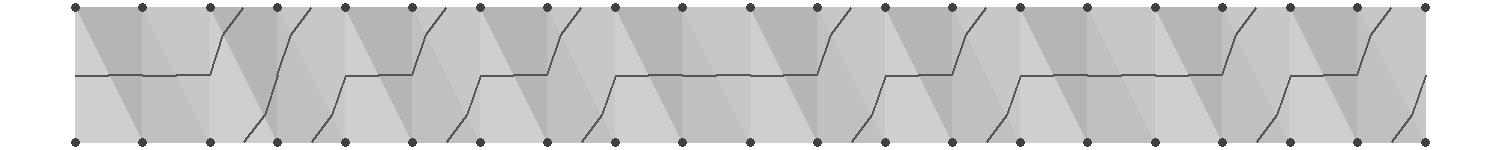

In [35]:
draw(S('a{n > 1 and all(n % i != 0 for i in range(2,n))}')(horizontal), edges=range(1, 60))

`draw(S('a{the nth digit of pi is 0}')(horizontal))`

**Corollary:** There are some mapping classes which are uncomputable. For example,

`S('a{the nth digit of Chaitin's constant is 0}')`

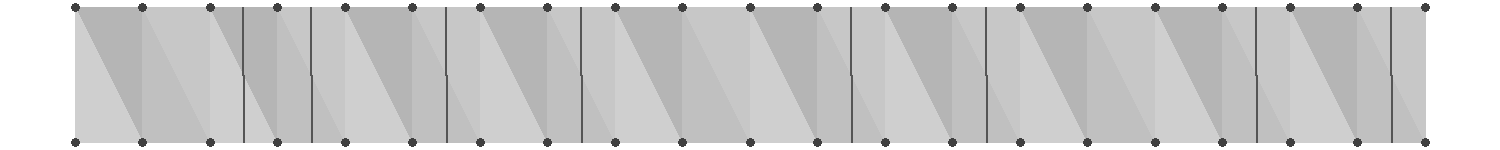

In [36]:
def test(n):
    return n > 1 and all(n % i for i in range(2,n))

primes = S.triangulation(lambda edge: 1 if edge % 3 != 0 and test(edge // 3) else 0)

draw(primes, edges=range(1, 60))

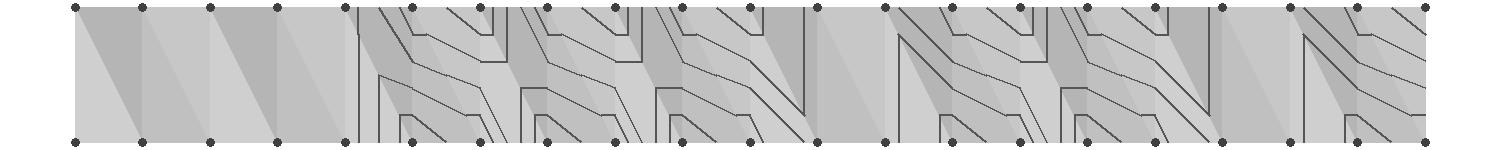

In [44]:
shifted = S('b[1::2].shift.shift')(primes)
draw(shifted, edges=range(1, 60))

In [42]:
shifted.twist()(horizontal)

Infinitely supported lamination 0: 1, 1: 1, -2: 1, -3: 1, 3: 1, 4: 1, -5: 1, -6: 1, 6: 1, 7: 1 ...

# Cantor sphere

In [45]:
C = bigger.load.cantor()

<center><img src="cantor.svg" alt="Cantor" style="width:1000px"/></center>

In [46]:
draw_northern = bigger.draw(edges=[(i, +1) for i in [0,1,2,3,6]], label='weight', textsize=16)

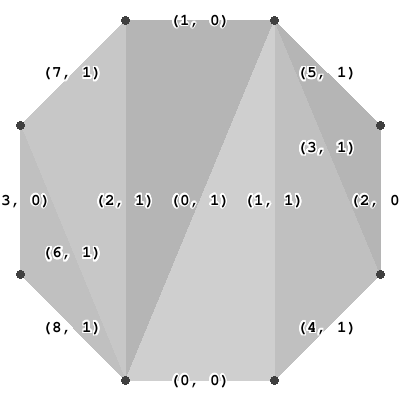

In [48]:
draw_northern(C, label='edge')  # , edges=[(i, +1) for i in [0,1,2,3,4,5,6,7,8,9,12,15,18]], textsize=10)

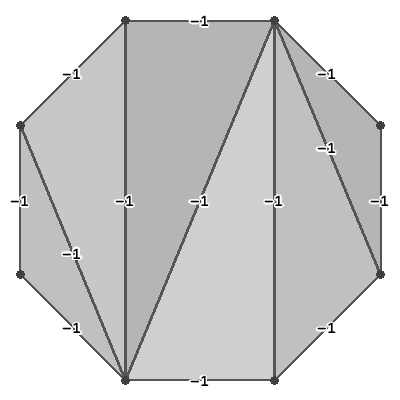

In [49]:
L_cantor = C.triangulation.as_lamination()
draw_northern(L_cantor)

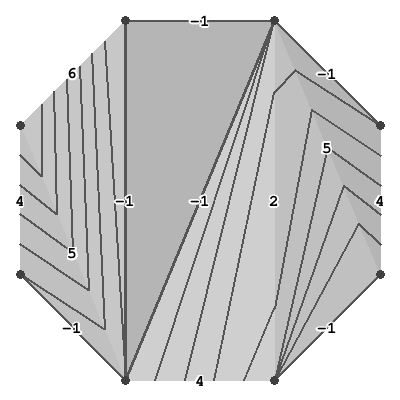

In [50]:
draw_northern(C('a_2.b_13')(L_cantor))

# Computability

## Thereom (Kérékjartó, Richards)

Infinite-type surfaces are determined by their set of ends E and the subset E<sub>g</sub> that are accumulated by genus. These are subsets of the Cantor set.

## Definition

An (ideal, labelled) triangulation T is **computable** if

`e → link(e) = (a, b, c, d)`

is a computable function.


## Theorem (McLeay-Parlier)

Any surface of infinite type admits an (ideal) triangulation.

**Proposition**: There are uncountably many surfaces but only countably many computable triangulations. Hence most surfaces do not have a computable triangulation.

**Proof**: 

<center><img src="figures/surface/1.svg" style="width: 1300px;"/></center>

**Proof**: 

<center><img src="figures/surface/2.svg" style="width: 1300px;"/></center>

**Proof**: 

<center><img src="figures/surface/3.svg" style="width: 1300px;"/></center>

**Proof**: 

<center><img src="figures/surface/4.svg" style="width: 1300px;"/></center>

### Definition

- A measured lamination L on S is **T-computable** if i → µ<sub>L</sub>(e<sub>i</sub>) is a computable function.
- A mapping class h ∈ MCG(S) is **T-computable** if for every T-computable lamination L, h(L) is T-computable and L → h(L) is a computable function.

### Definition 

The **computable mapping class group** CMCG<sub>T</sub>(S) is the subgroup of the mapping class group of S consisting of all T-computable mapping classes.

Those definitions depend on the choice of T. So our ability to manipulate a particular lamination or mapping class may vary with the choice of T

## Theorem

- All curves are computable.
- A multicurve c is computable if and only if T_c, the Dehn twist about c is computable.

In fact there is an algorithm for constructing T_c from c and vice versa.

<center><img src="figures/function/1.svg" style="width: 500px;"/></center>

<center><img src="figures/function/2.svg" style="width: 500px;"/></center>

<center><img src="figures/function/3.svg" style="width: 500px;"/></center>

<center><img src="figures/function/4.svg" style="width: 500px;"/></center>

<center><img src="figures/function/5.svg" style="width: 500px;"/></center>

# Group Problems

**Word Problem**: Is this element the identity element?


### Theorem (Hernández Hernández-Morales-Valdez)

A mapping class is the identity if and only if it fixes every (computable) curve.

**Isomorphism Problem**: Is this group isomorphic to another group?

### Theorem (Bavard-Dowdall-Rafi)

MCG(S) and MCG(S') are isomorphic if and only if S and S' are homeomorphic*.

## Nielsen Realisation Theorem (Afton–Calegari–Chen–Lyman)

If H < MCG(S) is a finite subgroup then there is a group of isometries of a hyperbolic metric on S realising it.

## Theorem

If H < CMCG<sub>T</sub>(S) is a finite subgroup then there is a group of isometries of a hyperbolic metric on S realising it that is computable.

**Proof:** The Nielsen Realisation Theorem guarantees there is an H-invariant polygonalisation, and we can build one from unicorn arcs.

<p><center><img src="figures/nielsen.svg" style="width:550px;"/></center></p>

In [51]:
f = S('a{n % 17 == 1}.b{n % 7 == 6}')
h = S('rotate').conjugate_by(f)

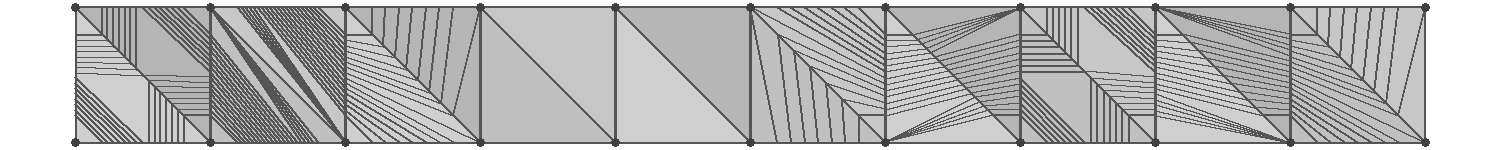

In [52]:
L = S.triangulation.as_lamination()
draw(L, h(L))  # h has order 2 so we don't need h(h(L)), h(h(h(L))), ...

So a subset of the unicorn arcs in this picture form an H-invariant polygonalisation.

Therefore by defining each such polygon to be a regular hyperbolic polygon glued with zero shear, we obtain an H-invariant hyperbolic structure on S.

## Problems

- Find an example of a surface which doesn't have a computable triangulation.
- Is the computable mapping class group ever a *normal* subgroup of the mapping class group?

# Thank you

Comments? Open a ticket: https://github.com/MarkCBell/bigger/issues

Suggestions? Open a pull request: https://github.com/MarkCBell/bigger/pulls